Dane: https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors
Cel: zbadanie nastrojów wśród pracowników organizacji, w kontekście ich możliwości awansu lub odejścia
Stakeholder: dział HR potrzebuje insightów na temat pracowników, którzy odeszli z firmy i ryzyka jakim obarczone są osoby, które przez dłuższy czas pozostają bez awansu


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [4]:
df = pd.read_csv('HR_Analytics.csv')

print("Pierwsze 5 wierszy:")
df.head()

Pierwsze 5 wierszy:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
print("Informacje o danych:")
print(df.info())

Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Job

In [6]:
print("Brakujące wartości w danych:")
df.isnull().sum().sort_values(ascending=False)

Brakujące wartości w danych:


Age                         0
StandardHours               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
MonthlyIncome               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
MonthlyRate                 0
MaritalStatus               0
Attrition                   0
EmployeeCount               0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
JobSatisfaction             0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole   

In [7]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

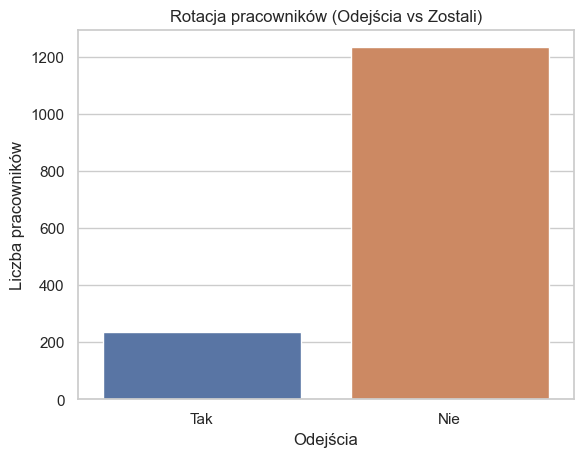

In [8]:
sns.countplot(x='Attrition', data=df)
plt.title('Rotacja pracowników (Odejścia vs Zostali)')
plt.xlabel('Odejścia')
plt.xticks(ticks=[0, 1], labels=['Tak', 'Nie'])
plt.ylabel('Liczba pracowników')
plt.show()

C:\Users\Franki\AppData\Roaming\Python\Python311\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Franki\AppData\Roaming\Python\Python311\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Franki\AppData\Roaming\Python\Python311\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\F

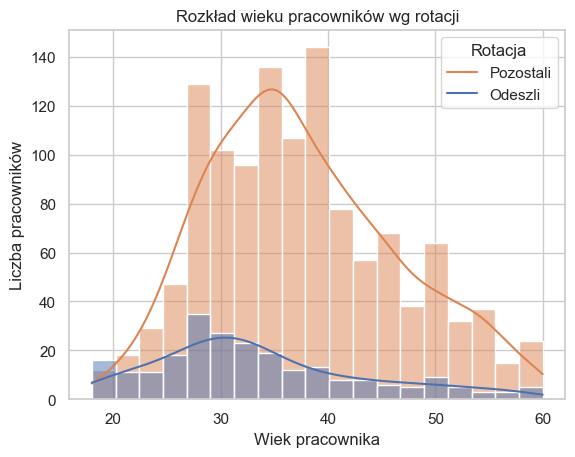

In [9]:
sns.histplot(data=df, x='Age', hue='Attrition', kde=True)
plt.title('Rozkład wieku pracowników wg rotacji')
plt.xlabel('Wiek pracownika')
plt.ylabel('Liczba pracowników')
plt.legend(title='Rotacja', labels=['Pozostali', 'Odeszli'])
plt.show()

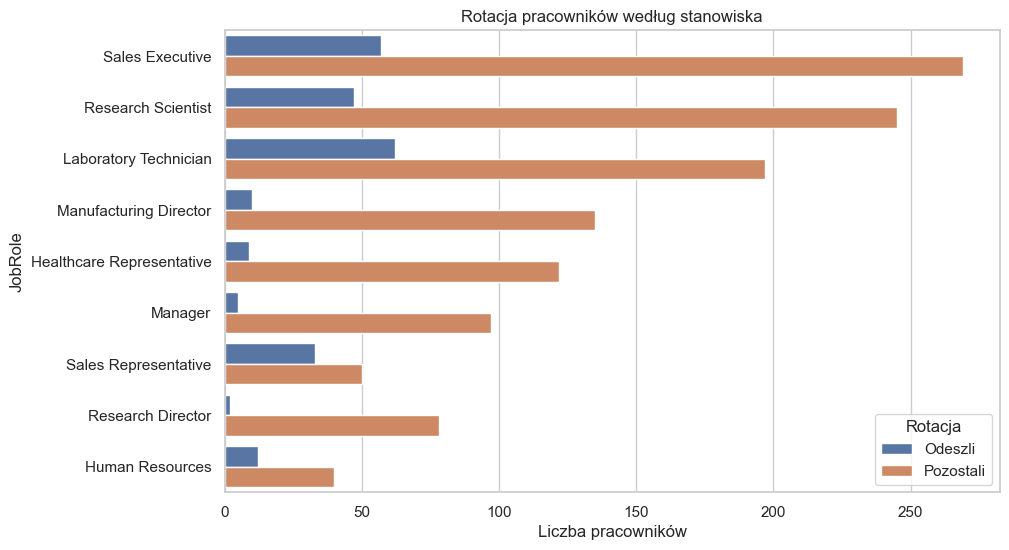

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(y='JobRole', hue='Attrition', data=df)
plt.title('Rotacja pracowników według stanowiska')
plt.xlabel("Liczba pracowników")
plt.legend(title='Rotacja', labels=['Odeszli', 'Pozostali'])
plt.show()

In [11]:
df['Age'].min()

18

In [12]:
df['Age'].max()

60

In [13]:
bins = [0, 17, 25, 35, 45, 55, 65, 100]  # Zakresy wiekowe
labels = ['0', '18-25', '26-35', '36-45', '46-55', '56-65', '66+']  # Etykiety dla grup

# Dodanie kolumny AgeGroup do DataFrame
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [14]:
# Filtrowanie danych dla pracowników, którzy odeszli
df_attrition = df[df['Attrition'] == 'Yes']

print("\nPierwsze 5 wierszy z grupą wiekową (odejścia):")
print(df_attrition[['Age', 'AgeGroup']].head())


Pierwsze 5 wierszy z grupą wiekową (odejścia):
    Age AgeGroup
0    41    36-45
2    37    36-45
14   28    26-35
21   36    36-45
24   34    26-35


In [15]:
age_group_counts_attrition = df_attrition['AgeGroup'].value_counts().sort_index()
print("\nLiczba pracowników w każdej grupie wiekowej (odejścia):")
print(age_group_counts_attrition)



Liczba pracowników w każdej grupie wiekowej (odejścia):
AgeGroup
0          0
18-25     44
26-35    116
36-45     43
46-55     26
56-65      8
66+        0
Name: count, dtype: int64


In [16]:
# Sprawdzenie liczby pracowników w każdej grupie wiekowej dla wszystkich pracowników
agc_all = df['AgeGroup'].value_counts().sort_index()
print("\nLiczba pracowników w każdej grupie wiekowej (wszyscy pracownicy):")
print(agc_all)


Liczba pracowników w każdej grupie wiekowej (wszyscy pracownicy):
AgeGroup
0          0
18-25    123
26-35    606
36-45    468
46-55    226
56-65     47
66+        0
Name: count, dtype: int64


C:\Users\Franki\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Franki\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


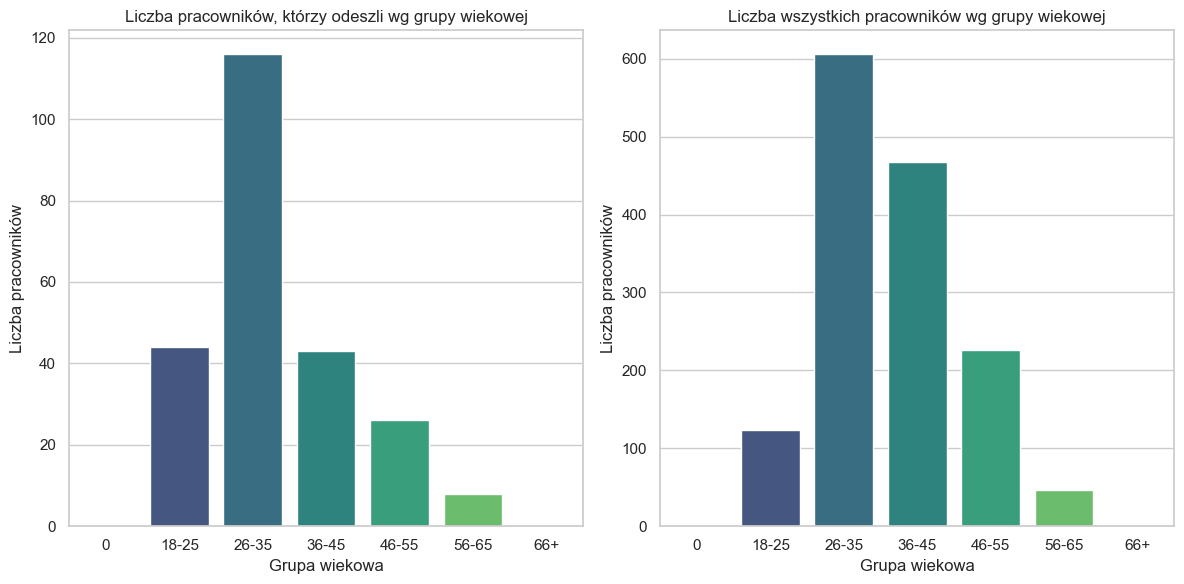

In [17]:
plt.figure(figsize=(12, 6))

# Wykres porównawczy: liczba pracowników w każdej grupie wiekowej
plt.subplot(1, 2, 1)
sns.barplot(x=age_group_counts_attrition.index, y=age_group_counts_attrition.values, palette='viridis')
plt.title('Liczba pracowników, którzy odeszli wg grupy wiekowej')
plt.xlabel('Grupa wiekowa')
plt.ylabel('Liczba pracowników')

# Wykres dla wszystkich pracowników
plt.subplot(1, 2, 2)
sns.barplot(x=agc_all.index, y=agc_all.values, palette='viridis')
plt.title('Liczba wszystkich pracowników wg grupy wiekowej')
plt.xlabel('Grupa wiekowa')
plt.ylabel('Liczba pracowników')

plt.tight_layout()
plt.show()

In [18]:
# age_group_counts_all = df['AgeGroup'].value_counts(normalize=True) * 100
# age_group_counts_attrition = df_attrition['AgeGroup'].value_counts(normalize=True) * 100

# plt.figure(figsize=(12, 6))

# # Wykres kołowy dla wszystkich pracowników
# plt.subplot(1, 2, 1)
# plt.pie(age_group_counts_all, 
#         labels=age_group_counts_all.index, 
#         autopct='%1.1f%%', 
#         startangle=90, 
#         colors=sns.color_palette('viridis', len(age_group_counts_all))
#         )
# plt.title('Procent pracowników wg grupy wiekowej (wszyscy)', fontsize=14)

# # Wykres kołowy dla pracowników, którzy odeszli
# plt.subplot(1, 2, 2)
# plt.pie(age_group_counts_attrition,
#         labels=age_group_counts_attrition.index, 
#         autopct='%1.1f%%', 
#         startangle=90, 
#         colors=sns.color_palette('viridis', len(age_group_counts_attrition))
#         )
# plt.title('Procent odejścia z pracy wg grupy wiekowej', fontsize=14)

# plt.tight_layout()
# plt.show()

In [19]:
# Powyższy wykres kołowy zaprezentowany poniżej jako wykres słupkowy celem lepszej prezentacji wyników

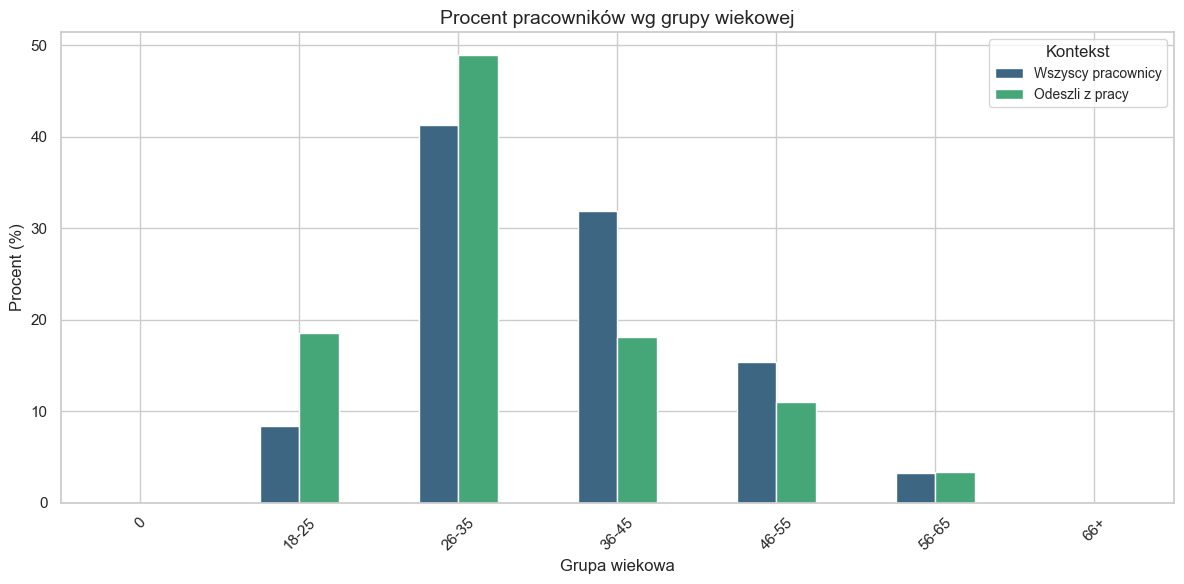

In [20]:
# Dane: grupy wiekowe
age_group_counts_all = df['AgeGroup'].value_counts(normalize=True) * 100
age_group_counts_attrition = df_attrition['AgeGroup'].value_counts(normalize=True) * 100

# Tworzenie DataFrame do wizualizacji
age_group_df = pd.DataFrame({
    'Wszyscy pracownicy': age_group_counts_all,
    'Odeszli z pracy': age_group_counts_attrition
}).sort_index()

# Wykres słupkowy
plt.figure(figsize=(12, 6))
age_group_df.plot(kind='bar', ax=plt.gca(), color=['#3c6682', '#45a778'])

# Dodanie tytułu i etykiet osi
plt.title('Procent pracowników wg grupy wiekowej', fontsize=14)
plt.xlabel('Grupa wiekowa', fontsize=12)
plt.ylabel('Procent (%)', fontsize=12)

# Dodanie legendy
plt.legend(title='Kontekst', fontsize=10)
plt.xticks(rotation=45)  # Rotacja etykiet na osi x
plt.tight_layout()

plt.show()


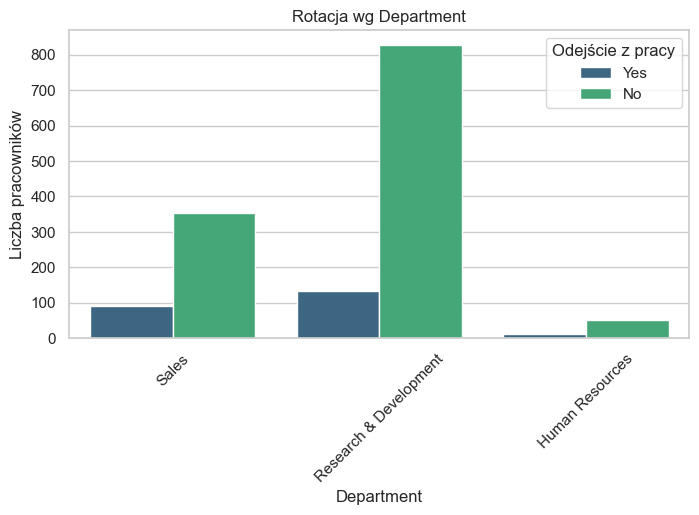

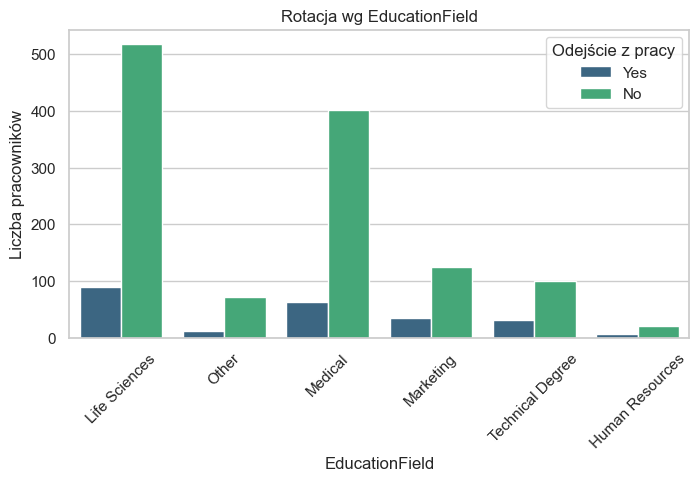

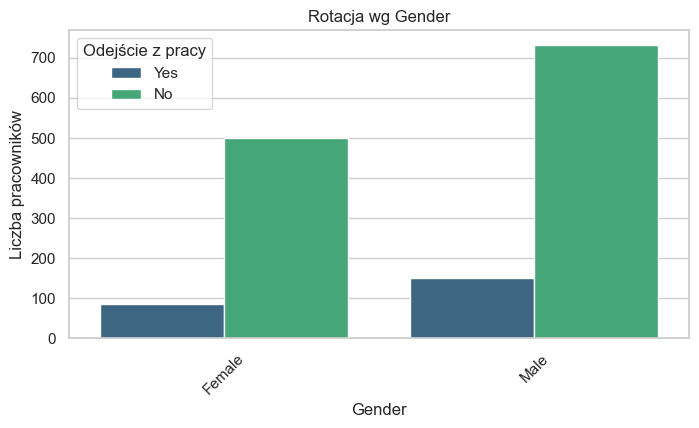

In [21]:
categorical_features = ['Department', 'EducationField', 'Gender']

for feature in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=feature, hue='Attrition', data=df, palette='viridis')
    plt.title(f'Rotacja wg {feature}')
    plt.ylabel('Liczba pracowników')
    plt.xticks(rotation=45)
    plt.legend(title='Odejście z pracy')
    plt.show()

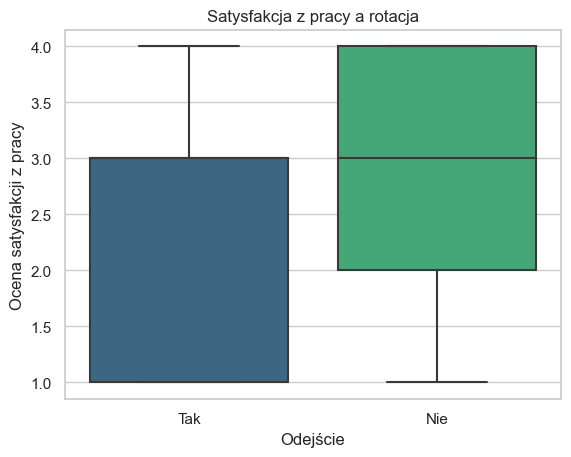

In [22]:
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df, palette='viridis')
plt.title('Satysfakcja z pracy a rotacja')
plt.ylabel('Ocena satysfakcji z pracy')
plt.xlabel('Odejście')
plt.xticks(ticks=[0, 1], labels=['Tak', 'Nie'])
plt.show()

In [23]:
df['Education'].replace([1,2,3,4,5],['Szkoła średnia','Collage', 'Licencjat', 'Magister', 'Doktorat'],inplace = True)
df_attrition['Education'].replace([1,2,3,4,5],['Szkoła średnia','Collage', 'Licencjat', 'Magister', 'Doktorat'],inplace = True)

C:\Users\Franki\AppData\Local\Temp\ipykernel_8900\2156784741.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education'].replace([1,2,3,4,5],['Szkoła średnia','Collage', 'Licencjat', 'Magister', 'Doktorat'],inplace = True)
C:\Users\Franki\AppData\Local\Temp\ipykernel_8900\2156784741.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

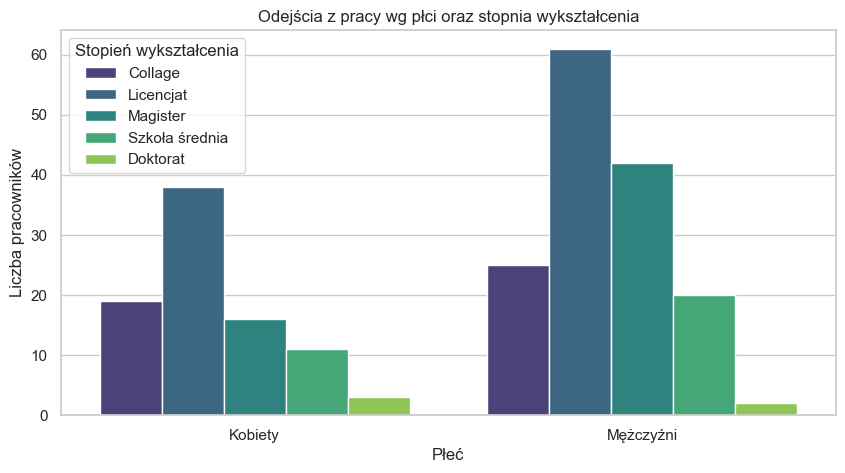

In [24]:
plt.figure(figsize = (10,5))

plt.title("Odejścia z pracy wg płci oraz stopnia wykształcenia")
sns.countplot(x = 'Gender', hue = 'Education', data = df_attrition, palette='viridis')
plt.xlabel('Płeć')
plt.xticks(ticks=[0, 1], labels=['Kobiety', 'Mężczyźni'])
plt.ylabel('Liczba pracowników')

plt.legend(title='Stopień wykształcenia')

Text(0, 0.5, 'Liczba pracowników')

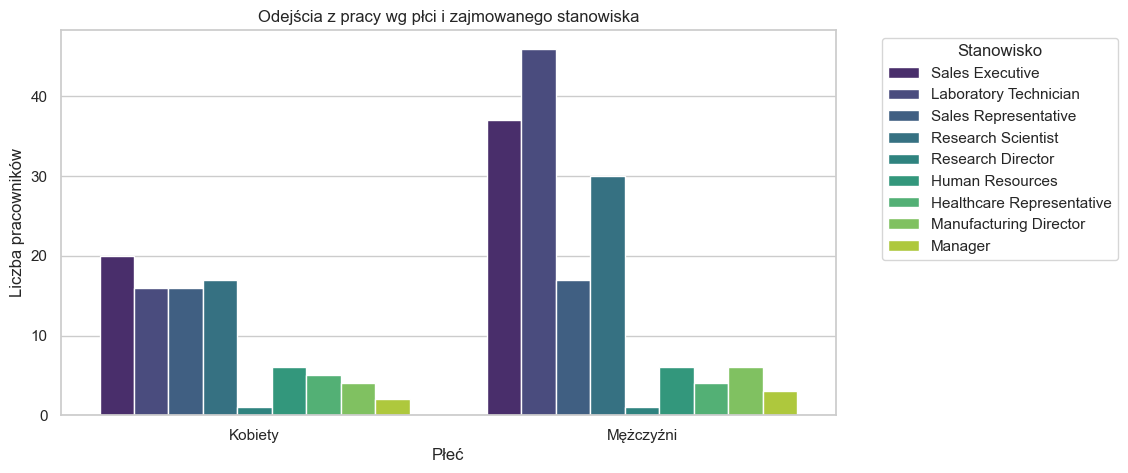

In [25]:
plt.figure(figsize = (10,5))

plt.title("Odejścia z pracy wg płci i zajmowanego stanowiska")
sns.countplot(x = 'Gender', hue = 'JobRole', data = df_attrition, palette='viridis')
plt.legend(title='Stanowisko', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Płeć')
plt.xticks(ticks=[0, 1], labels=['Kobiety', 'Mężczyźni'])
plt.ylabel('Liczba pracowników')

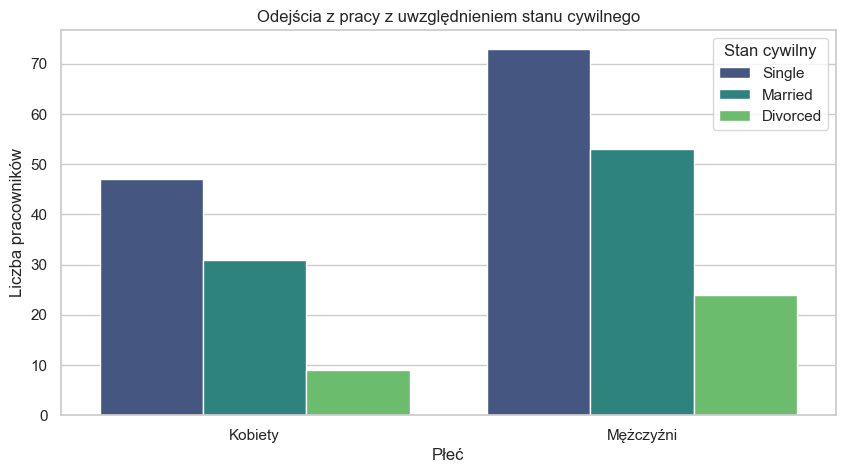

In [26]:
plt.figure(figsize = (10,5))

plt.title('Odejścia z pracy z uwzględnieniem stanu cywilnego')
sns.countplot(x = 'Gender', hue = 'MaritalStatus', data = df_attrition, palette='viridis')
plt.xlabel('Płeć')
plt.xticks(ticks=[0, 1], labels=['Kobiety', 'Mężczyźni'])
plt.ylabel('Liczba pracowników')
plt.legend(title='Stan cywilny')

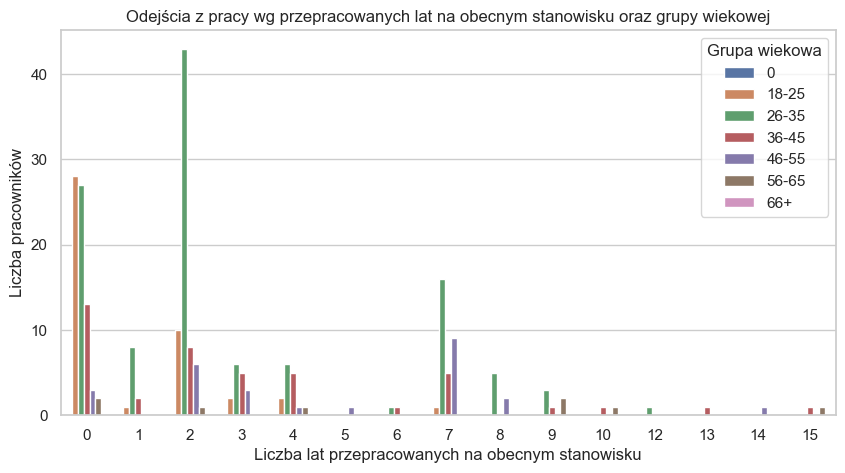

In [27]:
plt.figure(figsize = (10,5))

plt.title('Odejścia z pracy wg przepracowanych lat na obecnym stanowisku oraz grupy wiekowej')
sns.countplot(x = 'YearsInCurrentRole', hue = 'AgeGroup', data = df_attrition)
plt.xlabel('Liczba lat przepracowanych na obecnym stanowisku')
plt.ylabel('Liczba pracowników')
plt.legend(title='Grupa wiekowa', loc='upper right')

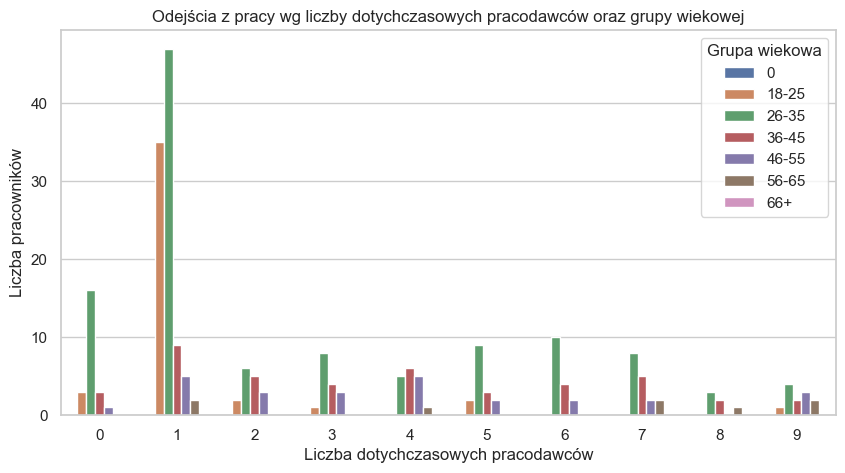

In [28]:
plt.figure(figsize = (10,5))

sns.countplot(x = 'NumCompaniesWorked', hue = 'AgeGroup', data = df_attrition)
plt.title("Odejścia z pracy wg liczby dotychczasowych pracodawców oraz grupy wiekowej")
plt.xlabel('Liczba dotychczasowych pracodawców')
plt.ylabel('Liczba pracowników')
plt.legend(title='Grupa wiekowa', loc='upper right')

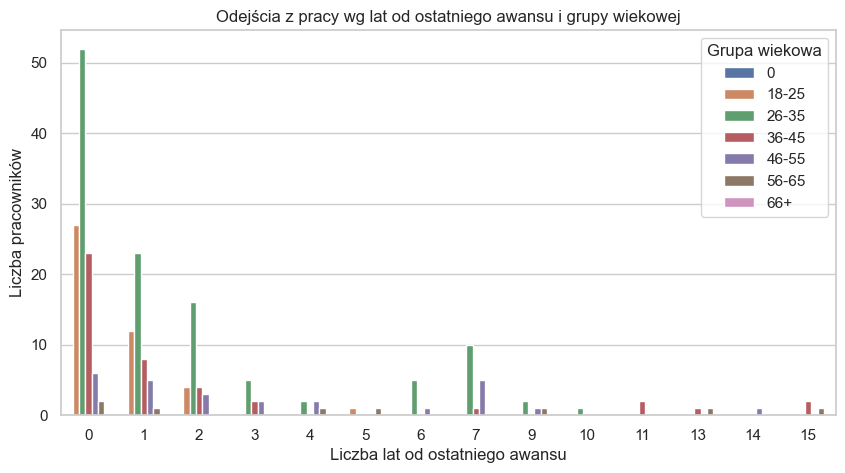

In [29]:
plt.figure(figsize = (10,5))

plt.title("Odejścia z pracy wg lat od ostatniego awansu i grupy wiekowej")
sns.countplot(x = 'YearsSinceLastPromotion', hue = 'AgeGroup', data = df_attrition)
plt.xlabel('Liczba lat od ostatniego awansu')
plt.ylabel('Liczba pracowników')
plt.legend(title='Grupa wiekowa', loc='upper right')

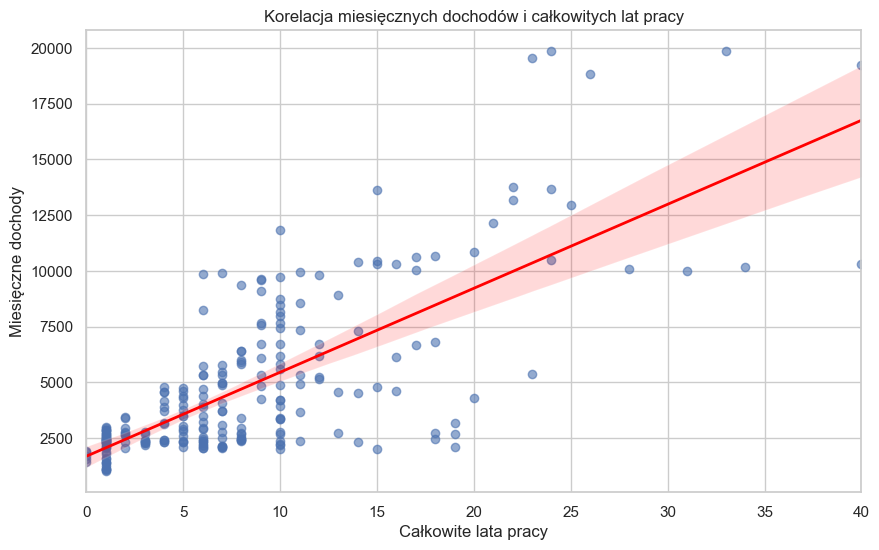

In [30]:
plt.figure(figsize=(10,6))

plt.title('Korelacja miesięcznych dochodów i całkowitych lat pracy')
# sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', data=df_attrition)
sns.regplot(x='TotalWorkingYears', y='MonthlyIncome', data=df_attrition, line_kws={"color": "red", "lw": 2}, scatter_kws={"alpha": 0.6})
plt.title('Korelacja miesięcznych dochodów i całkowitych lat pracy')
plt.xlabel('Całkowite lata pracy')
plt.ylabel('Miesięczne dochody')

plt.show()

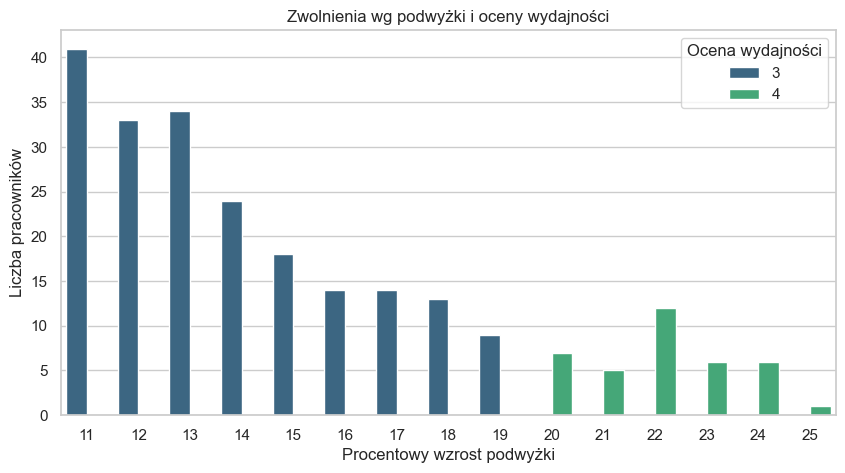

In [31]:
plt.figure(figsize = (10,5))


plt.title('Zwolnienia wg podwyżki i oceny wydajności')
sns.countplot(x = 'PercentSalaryHike', hue = 'PerformanceRating', data = df_attrition, palette='viridis')
plt.xlabel('Procentowy wzrost podwyżki')
plt.ylabel('Liczba pracowników')
plt.legend(title='Ocena wydajności', loc='upper right')

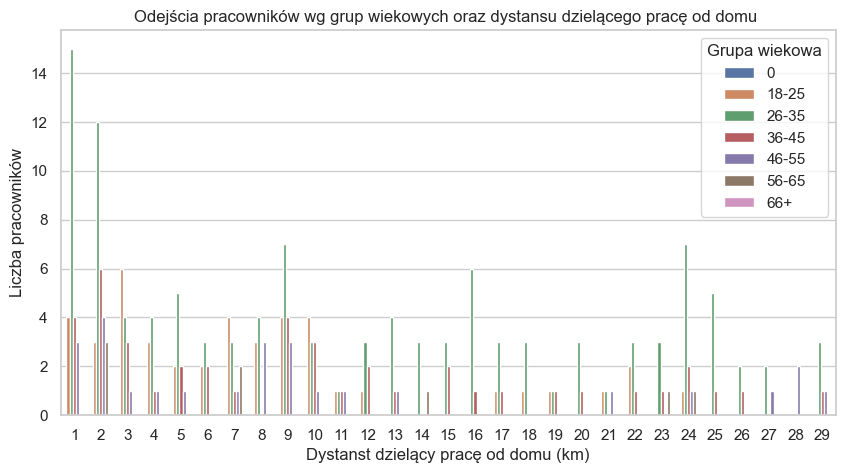

In [32]:
plt.figure(figsize = (10,5))

sns.countplot(x = 'DistanceFromHome', hue = 'AgeGroup', data = df_attrition)
plt.title("Odejścia pracowników wg grup wiekowych oraz dystansu dzielącego pracę od domu ")
plt.xlabel('Dystanst dzielący pracę od domu (km)')
plt.ylabel('Liczba pracowników')
plt.legend(title='Grupa wiekowa', loc='upper right')

In [33]:
# plt.figure(figsize = (10,10))

# plt.subplot(1,2,1)

# df_attrition['EnvironmentSatisfaction'].value_counts().plot(kind='pie', title='Zadowolenie ze środowiska pracy')
# plt.ylabel('Ocena')

# #Show Percentage of Attrition Per Age Group

# plt.subplot(1,2,2)

# df_attrition['WorkLifeBalance'].value_counts().plot(kind='pie', title = 'Równowaga między życiem zawodowym i prywatnym')
# plt.ylabel('Ocena')

In [34]:
# Powyższy wykres kołowy zaprezentowany poniżej jako wykres słupkowy celem lepszej prezentacji wyników

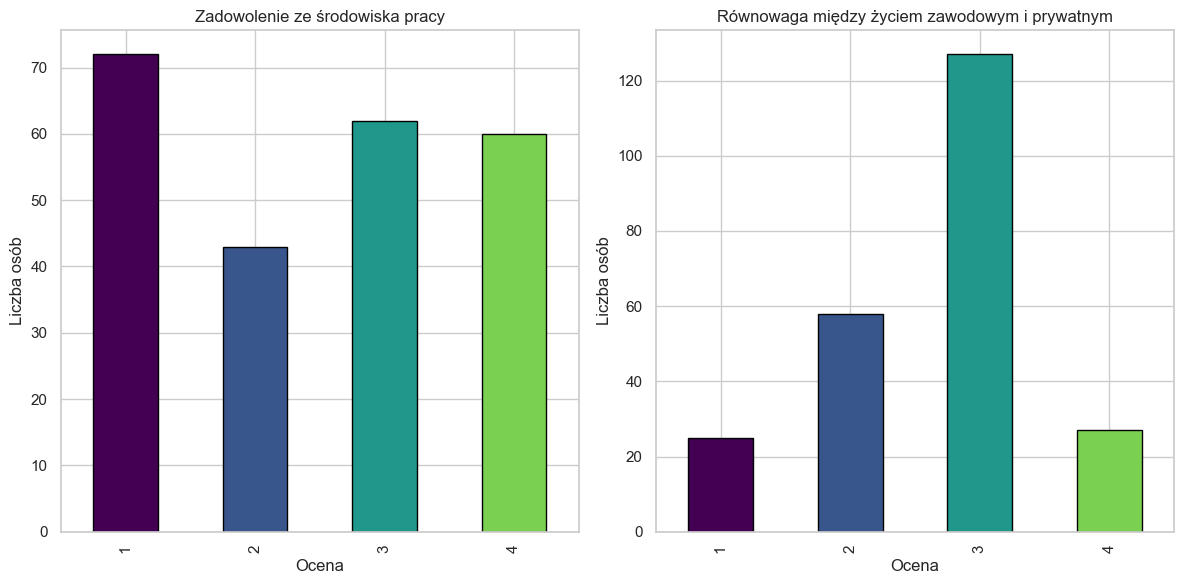

In [35]:
import numpy as np
from matplotlib.cm import get_cmap

plt.figure(figsize=(12, 6))

# Subplot 1:
plt.subplot(1, 2, 1)

colors_viridis_1 = get_cmap('viridis')(np.linspace(0, 0.8, df_attrition['EnvironmentSatisfaction'].nunique()))

df_attrition['EnvironmentSatisfaction'].value_counts().sort_index().plot(kind='bar', color=colors_viridis_1, edgecolor='black')
plt.title('Zadowolenie ze środowiska pracy')
plt.xlabel('Ocena')
plt.ylabel('Liczba osób')

# Subplot 2:
plt.subplot(1, 2, 2)

colors_viridis_2 = get_cmap('viridis')(np.linspace(0, 0.8, df_attrition['WorkLifeBalance'].nunique()))

df_attrition['WorkLifeBalance'].value_counts().sort_index().plot(kind='bar', color=colors_viridis_2, edgecolor='black')
plt.title('Równowaga między życiem zawodowym i prywatnym')
plt.xlabel('Ocena')
plt.ylabel('Liczba osób')


plt.tight_layout()
plt.show()

